In [1]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from matplotlib import pyplot
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/widsdatathon2022/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [4]:
print(train.isnull().sum())

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64


In [5]:
#pip install datawig

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Create an instance of Labelencoder
labelencoder = LabelEncoder()

In [8]:
# Assigning numerical values and storing it in another column
train['State_Factor'] = labelencoder.fit_transform(train['State_Factor'])
train['building_class'] = labelencoder.fit_transform(train['building_class'])
train['facility_type'] = labelencoder.fit_transform(train['facility_type'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  int64  
 2   building_class             75757 non-null  int64  
 3   facility_type              75757 non-null  int64  
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [10]:
train.apply(lambda x: x.fillna(x.mean(),inplace=True),axis=0)

Year_Factor                  None
State_Factor                 None
building_class               None
facility_type                None
floor_area                   None
                             ... 
direction_peak_wind_speed    None
max_wind_speed               None
days_with_fog                None
site_eui                     None
id                           None
Length: 64, dtype: object

In [11]:
y = train['site_eui']
x = train.drop('site_eui', axis=1)

In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, chi2
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression, mutual_info_regression
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=4)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [13]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [14]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

In [15]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
Modle = LinearRegression()
# fitting the training data
Modle.fit(x_train_fs,y_train)

LinearRegression()

In [16]:
print(Modle.score(x_test_fs, y_test))

0.18622811728774535


print(LR.coef_)

In [17]:
y_prediction =  Modle.predict(x_test_fs)
y_prediction

array([76.1745096 , 85.67607672, 52.66275637, ..., 85.67607672,
       56.10464826, 57.75103386])

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_prediction)
print('MAE: %.3f' % mae)

MAE: 27.437


In [19]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is 0.18622811728774535
mean_sqrd_error is== 2415.088339140392
root_mean_squared error of is== 49.1435482961944


In [20]:
predictions = Modle.predict(x_test_fs)


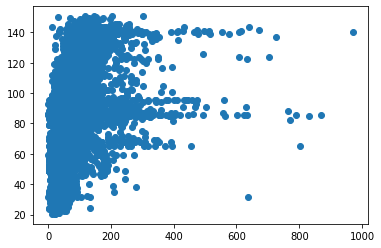

In [21]:
plt.scatter(y_test, predictions)

In [22]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions)
np.sqrt(metrics.mean_squared_error(y_test, predictions))
predictions

array([76.1745096 , 85.67607672, 52.66275637, ..., 85.67607672,
       56.10464826, 57.75103386])

In [23]:
#pip install datawig==0.2.0

In [24]:
test = pd.read_csv('/kaggle/input/widsdatathon2022/test.csv')

In [25]:
print(test.isnull().sum())

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64


In [26]:
# Assigning numerical values and storing it in another column
test['State_Factor'] = labelencoder.fit_transform(test['State_Factor'])
test['building_class'] = labelencoder.fit_transform(test['building_class'])
test['facility_type'] = labelencoder.fit_transform(test['facility_type'])
test.apply(lambda x: x.fillna(x.mean(),inplace=True),axis=0)

Year_Factor                  None
State_Factor                 None
building_class               None
facility_type                None
floor_area                   None
                             ... 
direction_max_wind_speed     None
direction_peak_wind_speed    None
max_wind_speed               None
days_with_fog                None
id                           None
Length: 63, dtype: object

In [27]:
t1 = fs.transform(test)
result = Modle.predict(t1)

In [28]:
result

array([ 77.09632862,  60.62739861, 110.03418866, ...,  39.41017223,
        53.13428058,  45.81475613])

In [29]:
test["site_eui"] = result.tolist()

In [30]:
test

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,site_eui
0,7,0,0,13,28484.0,1994.0,37.0,2.4,38,50.596774,...,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75757,77.096329
1,7,0,0,13,21906.0,1961.0,55.0,45.7,38,50.596774,...,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75758,60.627399
2,7,0,0,13,16138.0,1950.0,1.0,59.1,38,50.596774,...,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75759,110.034189
3,7,0,0,13,97422.0,1971.0,34.0,35.4,38,50.596774,...,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75760,79.841150
4,7,0,0,13,61242.0,1942.0,35.0,1.8,38,50.596774,...,29,5,2,0,340.000000,330.00000,22.800000,126.000000,75761,78.926210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,2,1,1,305925.0,2013.0,99.0,812.0,21,38.661290,...,39,3,0,0,321.743363,310.19469,18.131327,150.755102,85457,34.835469
9701,7,2,1,1,34909.0,1910.0,94.0,26.5,21,38.661290,...,39,3,0,0,321.743363,310.19469,18.131327,150.755102,85458,39.410172
9702,7,2,1,1,42393.0,2014.0,94.0,812.0,21,38.661290,...,39,3,0,0,321.743363,310.19469,18.131327,150.755102,85459,39.410172
9703,7,2,1,1,25368.0,1992.0,79.0,812.0,21,38.661290,...,39,3,0,0,321.743363,310.19469,18.131327,150.755102,85460,53.134281


In [31]:
sub = pd.read_csv("/kaggle/input/widsdatathon2022/sample_solution.csv")
sub["site_eui"] = test["site_eui"]
sub.to_csv("submission.csv", index = False)

In [32]:
sub

,id,site_eui
0,75757,77.096329
1,75758,60.627399
2,75759,110.034189
3,75760,79.841150
4,75761,78.926210
...,...,...
9700,85457,34.835469
9701,85458,39.410172
9702,85459,39.410172
9703,85460,53.134281


## 